In [37]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
import datetime
import glob


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (10., 10.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
MREGIONS = {'WAf' : [[-18,25,4,25], 'spac', 0, (1,7), (8,12), (1,12)], # last is hourly offset to UCT # 12    # [-18,25,4,25]
 'SAf' : [[20,35, -35,-15], 'spac', 2, (9,12), (1,5), (1,12)], # 10
 'india' : [[70,90, 5,30], 'asia', 5, (1,7), (8,12), (1,12)], # 7
 'china' : [[105,115,25,40], 'asia', 8 , (1,7), (8,12), (1,12)], # 4
 'australia' : [[120,140,-23, -11], 'asia', 9, (10,12), (1,5), (1,12)], # 3
 'sub_SA' : [[-68,-47, -40, -20.5], 'spac', -4, (9,12), (1,5), (1,12)] , # 16
# 'trop_SA' : [[-75, -50, -20, -5], 'spac', -5, (1,12), (1,12), (1,12)], # 17
 'GPlains' : [[-100,-90,32,47], 'nam', -6, (1,7), (8,12), (1,12)] # # 18

}
REGION = 'WAf'

In [4]:
rdics = {}
for regs in MREGIONS.keys():
    for ids, y in enumerate(range(2000,2020)):
        test = pd.read_csv('/media/ck/LStorage/global_water/save_files/'+regs+'_initTime__mcs_tracks_extc_'+str(y)+'0101_'+str(y)+'1231.csv')
        if ids == 0:
            test2 = pd.DataFrame(test)
        else :
            test2 = pd.concat([test2, test])
    rdics[regs] = test2

In [60]:
tab = rdics[REGION]

In [61]:
#tab = pd.read_table(file, parse_dates=True, delimiter=',')

In [62]:
# test= tab[tab.time==tab.time[0]]
# test.com_lon.values

In [63]:
tab.keys()

Index(['length', 'mcs_length', 'mcs_type', 'starttrackresult',
       'endtrackresult', 'base_time', 'mcs_status', 'meanlat', 'meanlon',
       'core_area', 'ccs_area', 'mintb', 'meantb', 'ccs_meantb', 'core_meantb',
       'speed', 'direction1', 'direction-1', 'direction-2', 'direction0',
       'uspeed', 'vspeed', 'trackresult', 'cloudnumber', 'majoraxislength',
       'eccentricity', 'pf_length', 'pf_mcsstatus', 'pf_heavyrainratio',
       'total_rain', 'total_heavyrain', 'rainrate_heavyrain', 'npf',
       'pf_landfrac', 'pf_area1', 'pf_area2', 'pf_area3', 'pf_lon1', 'pf_lon2',
       'pf_lon3', 'pf_lat1', 'pf_lat2', 'pf_lat3', 'pf_rainrate1',
       'pf_rainrate2', 'pf_rainrate3', 'pf_maxrainrate1', 'pf_maxrainrate2',
       'pf_maxrainrate3', 'pf_accumrain1', 'pf_accumrain2', 'pf_accumrain3',
       'pf_accumrainheavy1', 'pf_accumrainheavy2', 'pf_accumrainheavy3',
       'pf_majoraxislength1', 'pf_majoraxislength2', 'pf_majoraxislength3',
       'pf_aspectratio1', 'pf_aspectratio

In [64]:
tab.head()

,length,mcs_length,mcs_type,starttrackresult,endtrackresult,base_time,mcs_status,meanlat,meanlon,core_area,...,month,hour,minute,tracktime,trackid,londiff_loc-init,latdiff_loc-init,init_lon,init_lat,init_hour
0,11.0,NaN,1,2.0,0.0,2000-06-01 00:30:00,1.0,7.915394,-11.926018,205000.0,...,6,0,30,0,1,0.000000,0.000000,-11.926018,7.915394,0
1,11.0,NaN,1,2.0,0.0,2000-06-01 01:30:00,1.0,7.810731,-12.158462,193300.0,...,6,1,30,1,1,-0.232444,-0.104663,-11.926018,7.915394,0
2,11.0,NaN,1,2.0,0.0,2000-06-01 02:30:00,1.0,7.584003,-12.644917,184100.0,...,6,2,30,2,1,-0.718899,-0.331392,-11.926018,7.915394,0
3,11.0,NaN,1,2.0,0.0,2000-06-01 03:30:00,1.0,7.168571,-13.024425,180300.0,...,6,3,30,3,1,-1.098408,-0.746823,-11.926018,7.915394,0
4,11.0,NaN,1,2.0,0.0,2000-06-01 04:30:00,1.0,6.550696,-13.234845,171100.0,...,6,4,30,4,1,-1.308827,-1.364698,-11.926018,7.915394,0


In [65]:
tab = tab[(tab['hour'] >= 16) & (tab['hour'] <=18)]

In [66]:
print(tab.meanlon.max(), tab.meanlon.min(), tab.meanlat.max(), tab.meanlat.min())

29.277245 -56.35709 29.720137 -11.2325115


In [67]:
box = [-8,-6,12,14]
np.sum((tab.meanlon>box[0]) & (tab.meanlon<box[1]) & (tab.meanlat>box[2]) & (tab.meanlat<box[3]))

310

In [69]:
tab = tab.loc[(tab.meanlon>box[0]) & (tab.meanlon<box[1]) & (tab.meanlat>box[2]) & (tab.meanlat<box[3])]

In [73]:
lists = []
for row in tab.iterrows():
    #ipdb.set_trace()
    fdate = pd.to_datetime(row[1]['base_time'])
    
    lists.append(datetime.datetime(fdate.year, fdate.month, fdate.day))
tab['date'] = lists

In [76]:
np.unique(tab['date']).size

164

In [77]:
def cut_kernel(xpos, ypos, arr, date, lon, lat):

    #AMSRE 0.25 degrees ~ 27.5 km
    dist = 10

    kernel = u_arrays.cut_kernel(arr,xpos, ypos,dist)


    # if (np.sum(np.isfinite(kernel)) < 0.10 * kernel.size):
    #     return

    kernel3 = kernel - np.nanmean(kernel)

    cnt = np.zeros_like(kernel)
    cnt[np.isfinite(kernel)] = 1

    if kernel.shape != (dist*2+1, dist*2+1):
        return None

    return kernel, kernel3, cnt

In [80]:
def run(shift):
    dic = {
    'q' : [],
    'qup' : [],
    't' : [],
    'u' : [],
    'v' : [],
    'w' : [],
    'u_orig' : [],
    'v_orig' : [],        
    'd' : [],
    't2' : [],
    'u10' : [],
    'v10' : [],
    'u10_orig' : [],
    'v10_orig' : [],
    'slp' : [],
    'cnt' : [],
    'cape' : [],
    'divMoist' : [],
    'ice' : [],
    'ice_orig' : [],
   # 'sh' : [],
    'rh' : [],
    'zshear' : [],
    'theta' : []
    }
    era5_files = cnst.lmcs_drive+ 'ERA5/hourly/' #cnst.ERA5 + 'hourly/
    af_pl = sorted(glob.glob(era5_files+'pressure_levels/'+REGION+'/'+'*.nc'))
    af_srfc = sorted(glob.glob(era5_files+'surface/'+REGION+'/'+'*.nc'))
    
    for date in tab['date']:

        single = tab[tab.date==date]

        dt = pd.to_datetime(date)
        daystring = str(abs(shift))
        dayd = pd.Timedelta(daystring + 'days')
        if shift < 0:
            dt = dt - dayd
        if shift >=0:
            dt = dt + dayd
            
        window1 = dt - pd.Timedelta('7days')
        window2 = dt + pd.Timedelta('7days')
        

        fdate = '_' + str(dt.year) +'_' + str(dt.month).zfill(2) + '_' + str(dt.day).zfill(2)
        
        hour = 12
        shour = 12

        try:
            pl_file = era5_files + 'pressure_levels/'+REGION+'/ERA5' + fdate + '_'+REGION+'_pl.nc'
            srfc_file = era5_files + 'surface/'+REGION+'/ERA5' + fdate + '_'+REGION+'_srfc.nc'
          
            lsta = xr.open_dataset(pl_file) #sma  #'AMSR_L3_LPRMv05_A_'
            srfc = xr.open_dataset(srfc_file) #sma  #'AMSR_L3_LPRMv05_A_'

        except:
            #print('File missing', era5_files + 'pressure_levels/'+REGION+'/ERA5' + fdate + '_'+REGION+'_pl.nc')
            continue
            
        lsta = u_darrays.flip_lat(lsta)
        srfc = u_darrays.flip_lat(srfc)
        

        lsta = lsta.sel(longitude=slice(-18, 0), latitude=slice(10,17))        
        srfc = srfc.sel(longitude=slice(-18, 0), latitude=slice(10,17))

        

        
        try:
            lsta_low = lsta.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(hour).zfill(2)+':00:00', level=925)
        except:
            continue
        lsta_up = lsta.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(hour).zfill(2)+':00:00', level=650)
        
        srfc_low = srfc.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(hour).zfill(2)+':00:00')

        fpl_pos = af_pl.index(pl_file)
        fsrfc_pos = af_srfc.index(srfc_file)
        
        pl_toread = np.array(af_pl)[fpl_pos-8:fpl_pos+8]
        srfc_toread = np.array(af_srfc)[fsrfc_pos-8:fsrfc_pos+8]
        
        lsta10 = xr.open_mfdataset(pl_toread)
        lsta10 = u_darrays.flip_lat(lsta10)
        lsta10 = lsta10.sel(time=lsta10['time.hour']==shour, longitude=slice(-18, 0), latitude=slice(10,17)).load()   


        lsta10_low = lsta10.sel(level=925) #time=slice(str(window1.year)+'-'+str(window1.month)+'-'+str(window1.day)+'T'+str(shour).zfill(2)+':00:00' , \
                                           #str(window2.year)+'-'+str(window2.month)+'-'+str(window2.day)+'T'+str(shour).zfill(2)+':00:00')
        lsta10_up = lsta10.sel(level=650)

        print('Climlen', len(srfc_toread))
        srfc10 = xr.open_mfdataset(srfc_toread)
        srfc10 = u_darrays.flip_lat(srfc10)
        srfc10 = srfc10.sel(time=srfc10['time.hour']==shour, longitude=slice(-18, 0), latitude=slice(10,17)).load() 

        q = lsta_low['q'].squeeze()
        qup = lsta_up['q'].squeeze()
        u = lsta_up['u'].squeeze()
        v = lsta_up['v'].squeeze()
        w = lsta_low['w'].squeeze()
        t = lsta_low['t'].squeeze()
        d = lsta_low['d'].squeeze()
        rh = lsta_low['r'].squeeze()
        t2 = srfc_low['t2m'].squeeze()
        u100 = srfc_low['u10'].squeeze()
        v100 = srfc_low['v10'].squeeze()
        slp = srfc_low['sp'].squeeze()
        cape = srfc_low['cape'].squeeze()
        divMoist = srfc_low['p84.162'].squeeze()
        ice = srfc_low['tciw'].squeeze()
       # sh = srfc_low['msshf'].squeeze()
        
        q_clim = lsta10_low['q'].squeeze().mean('time')
        qup_clim = lsta10_up['q'].squeeze().mean('time')
        u_clim = lsta10_up['u'].squeeze().mean('time')
        v_clim = lsta10_up['v'].squeeze().mean('time')
        w_clim = lsta10_low['w'].squeeze().mean('time')
        t_clim = lsta10_low['t'].squeeze().mean('time')
        rh_clim = lsta10_low['r'].squeeze().mean('time')
        d_clim = lsta10_low['d'].squeeze().mean('time')
        t2_clim = srfc10['t2m'].squeeze().mean('time')
        u100_clim = srfc10['u10'].squeeze().mean('time')
        v100_clim = srfc10['v10'].squeeze().mean('time')
        slp_clim = srfc10['sp'].squeeze().mean('time')
        cape_clim = srfc10['cape'].squeeze().mean('time')
        divMoist_clim = srfc10['p84.162'].squeeze().mean('time')
        ice_clim = srfc10['tciw'].squeeze().mean('time')
   

        print('Doing '+ 'AMSR_' + str(dt.year) + str(dt.month).zfill(2) + str(
        dt.day).zfill(2) + '.nc')
    
        theta_low = u_met.theta_e(925,lsta_low['t'].squeeze().values-273.15,lsta_low['q'].squeeze().values)
        theta_high = u_met.theta_e(650,lsta_up['t'].squeeze().values-273.15,lsta_up['q'].squeeze().values)
        thetadiff = (theta_low-theta_high).squeeze()
        
        theta10_low = u_met.theta_e(925,lsta10_low['t'].squeeze().mean('time').values-273.15,lsta10_low['q'].squeeze().mean('time').values)
        theta10_high = u_met.theta_e(650,lsta10_up['t'].squeeze().mean('time').values-273.15,lsta10_up['q'].squeeze().mean('time').values)
        thetadiff10 = (theta10_low-theta10_high).squeeze()
        
        cnt = np.zeros_like(q.values)
        cnt[np.isfinite(q.values)] = 1

        dic['q'].append(q.values- q_clim.values)
        dic['qup'].append(qup.values- qup_clim.values)
        dic['v'].append(v.values- v_clim.values)
        dic['w'].append(w.values- w_clim.values)
        dic['u'].append(u.values- u_clim.values)
        dic['rh'].append(rh.values- rh_clim.values)
        dic['v_orig'].append(v.values)#
        dic['u_orig'].append(u.values)#
        dic['t'].append(t.values-t_clim.values)
        dic['d'].append(d.values-d_clim.values)
        dic['t2'].append(t2.values-t2_clim.values)
        dic['u10'].append(u100.values-u100_clim.values)
        dic['v10'].append(v100.values-v100_clim.values)
        dic['u10_orig'].append(u100.values)#
        dic['v10_orig'].append(v100.values)#
        dic['slp'].append(slp.values-slp_clim.values)
        dic['cape'].append(cape.values-cape_clim.values)#s-v100_clim.values)
        dic['divMoist'].append(divMoist.values-divMoist_clim.values)#-slp_clim.values)
        dic['ice'].append(ice.values-ice_clim.values)
        dic['ice_orig'].append(ice.values)
       # dic['sh'].append(sh.values-sh_clim.values)
#         ws, wd = u_met.u_v_to_ws_wd(u.values-u100.values, v.values-v100.values)
#         wsclim, wd = u_met.u_v_to_ws_wd(u_clim.values-u100_clim.values, v_clim.values-v100_clim.values)
        dic['zshear'].append((u.values-u100.values)-(u_clim.values-u100_clim.values)) #-wsclim
        dic['theta'].append(thetadiff-thetadiff10)
        dic['cnt'].append(cnt)

        lat = lsta_low.latitude.values
        lon = lsta_low.longitude.values
        
        
    #ipdb.set_trace()
    for k in dic.keys():
        #print(k)
        dic[k] = np.nansum(np.stack(dic[k], axis=0), axis=0)

    return dic, lat, lon

In [81]:
def calc(dic):
    
    dics = {}
    for k in dic.keys():
        if k == 'cnt':
            continue
        dics[k] = dic[k] / dic['cnt']
    return dics

In [82]:
dic, lat, lon = run(0)

Climlen 16
Doing AMSR_20120424.nc
Climlen 16
Doing AMSR_20120424.nc
Climlen 16
Doing AMSR_20120424.nc
Climlen 16
Doing AMSR_20120617.nc
Climlen 16
Doing AMSR_20120617.nc
Climlen 16
Doing AMSR_20120617.nc
Climlen 16
Doing AMSR_20120715.nc
Climlen 16
Doing AMSR_20120812.nc
Climlen 16
Doing AMSR_20120819.nc
Climlen 16
Doing AMSR_20120822.nc
Climlen 16
Doing AMSR_20120822.nc
Climlen 16
Doing AMSR_20120916.nc
Climlen 16
Doing AMSR_20120916.nc
Climlen 16
Doing AMSR_20120916.nc
Climlen 16
Doing AMSR_20120918.nc
Climlen 16
Doing AMSR_20130704.nc
Climlen 16
Doing AMSR_20130706.nc
Climlen 16
Doing AMSR_20130721.nc
Climlen 16
Doing AMSR_20130721.nc
Climlen 16
Doing AMSR_20130721.nc
Climlen 16
Doing AMSR_20130808.nc
Climlen 16
Doing AMSR_20130808.nc
Climlen 16
Doing AMSR_20130808.nc
Climlen 16
Doing AMSR_20130821.nc
Climlen 16
Doing AMSR_20130821.nc
Climlen 16
Doing AMSR_20130831.nc
Climlen 16
Doing AMSR_20130831.nc
Climlen 16
Doing AMSR_20130927.nc
Climlen 16
Doing AMSR_20130927.nc
Climlen 16
Doi

In [83]:
dic['t2']/dic['cnt']

array([[-3.0321593e-04,  5.3461757e-03, -3.0299195e-03, ...,
        -3.1590396e-01, -2.3274273e-01, -1.5524936e-01],
       [ 1.7591285e-02,  1.3737950e-02, -1.6983172e-02, ...,
        -2.8347358e-01, -1.8136373e-01, -8.1321783e-02],
       [ 1.2780426e-02, -3.4255281e-03, -4.0534344e-02, ...,
        -3.5536516e-01, -2.3891065e-01, -1.1489112e-01],
       ...,
       [ 1.4086717e-01,  1.6162810e-01,  1.8997361e-01, ...,
        -7.5856310e-01, -7.0814753e-01, -7.3047996e-01],
       [ 1.5390715e-01,  1.7403671e-01,  2.0730451e-01, ...,
        -6.2182504e-01, -6.0577339e-01, -6.5996528e-01],
       [ 1.3587238e-01,  1.5516341e-01,  1.9343694e-01, ...,
        -5.6376410e-01, -5.6756115e-01, -5.8729398e-01]], dtype=float32)

In [84]:
dic = calc(dic)

In [56]:
import matplotlib.patches as patches
def draw_map(ax, t, lat, lon, title='', levels=None, quiver=None, contour=None):
   
    plt.contourf(lon, lat, t, transform=ccrs.PlateCarree(), cmap='RdBu', levels=levels, extend='both')
    ax.coastlines()

#     ## quiver list
#     if quiver is not None:
#         qu = ax.quiver(quiver['x'], quiver['y'], quiver['u'], quiver['v'],scale=quiver['scale'], width=0.003, headwidth=3.2)
    
    
        ## additional contour on plot   
    if contour is not None:
        contours = ax.contour(contour['x'], contour['y'], contour['data'], levels=contour['levels'], colors='k', linewidths=2 )
        plt.clabel(contours, inline=True, fontsize=7, fmt='%1.1f')
    
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    xl.xlines = False
    xl.ylines=False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--', color='grey');
    
    rect2 = patches.Rectangle((box[0],box[2]),box[1]-box[0],box[3]-box[2],linewidth=0.8,edgecolor='w',facecolor='none', zorder=99)
        
    ax.add_patch(rect2)
    
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label('K')

In [57]:
np.arange(-1,1,5)

array([-1])

/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


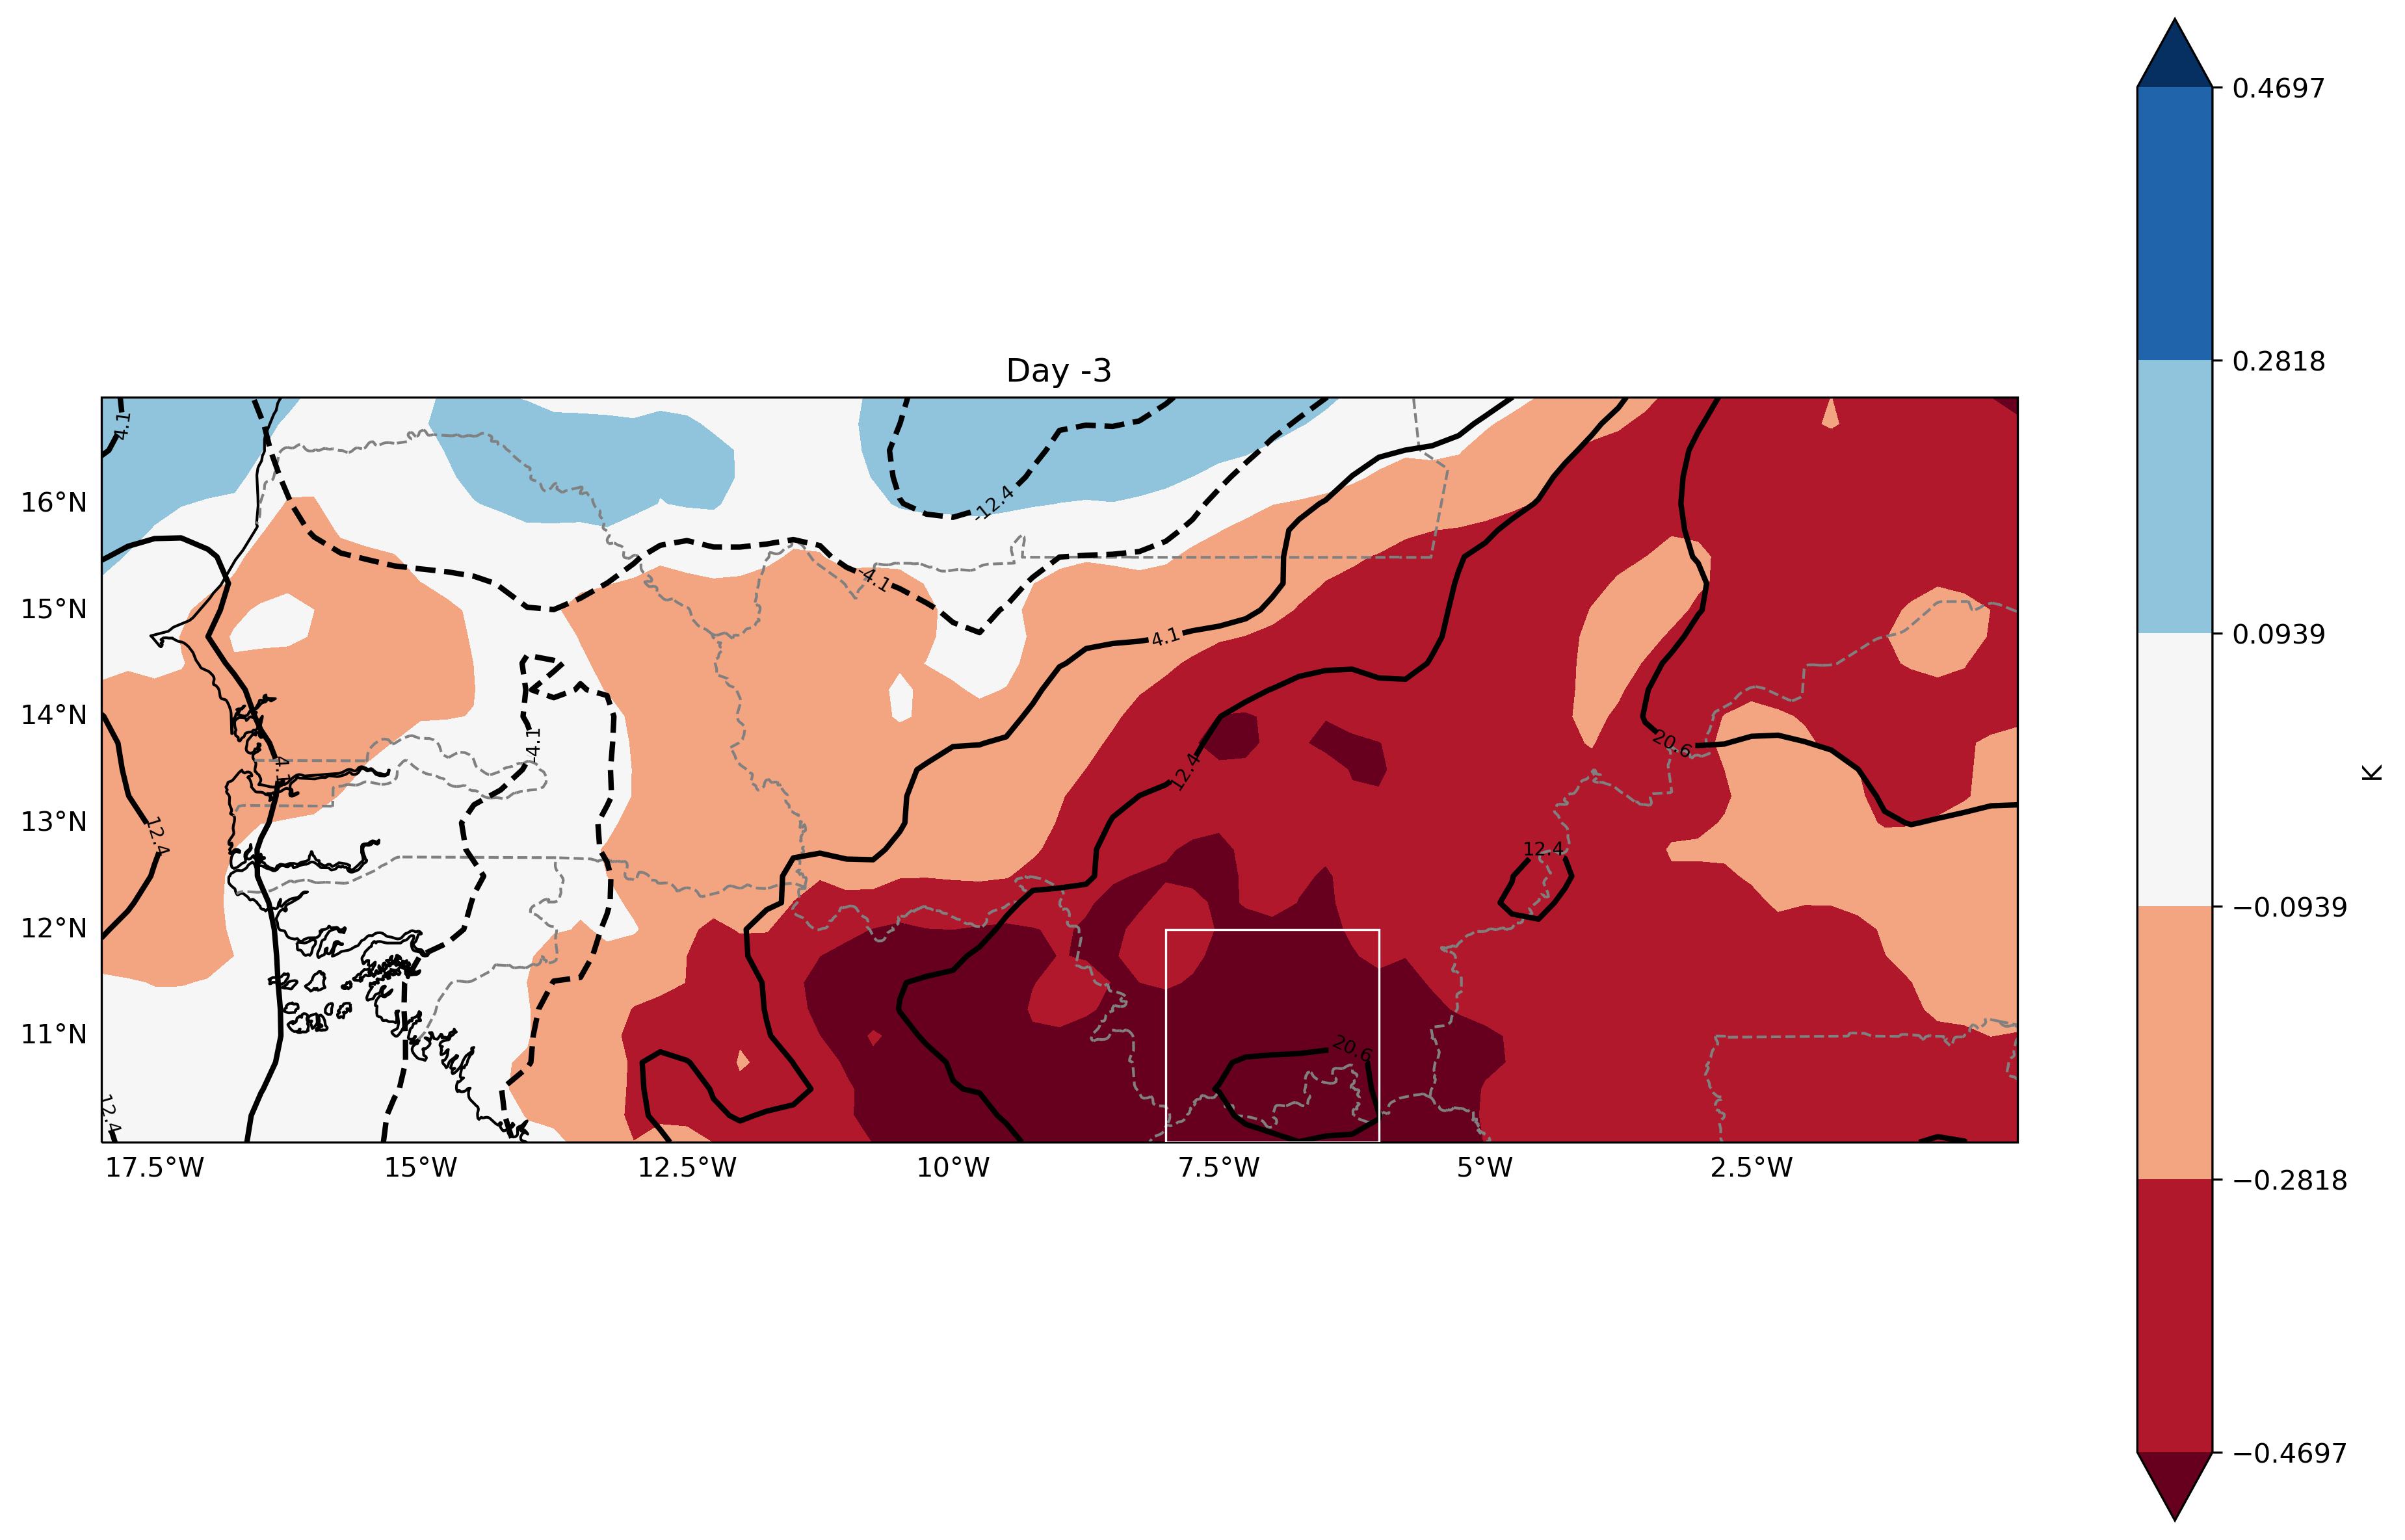

In [58]:
st=2
sarrow = 1
scale = 35
f = plt.figure(figsize=(13,8), dpi=300)

ax = f.add_subplot(111, projection=ccrs.PlateCarree())
lon2d, lat2d = np.meshgrid(lon,lat)
xquiv = lon2d[sarrow::st, sarrow::st]
yquiv = lat2d[sarrow::st, sarrow::st]


ws, wd = u_met.u_v_to_ws_wd(dic['u']-dic['u10'], dic['v']-dic['v10']) 

var = dic['t']
u = dic['u10']
v = dic['v10']
cvar = 'slp'
edge = np.max([np.abs(np.percentile(dic[cvar],10)),np.abs(np.percentile(dic[cvar],90))])
levs = np.linspace(edge*-1,edge,6)
contour = {'data' : dic[cvar], 'x': lon, 'y' : lat, 'levels' : levs}

edge = np.max([np.abs(np.percentile(var,10)),np.abs(np.percentile(var,90))])
lev = np.linspace(edge*-1,edge,6)

uu = u[sarrow::st, sarrow::st]
vv = v[sarrow::st, sarrow::st]
qin = {'x' : xquiv, 'y' : yquiv, 'u' : uu, 'v' : vv, 'scale' : scale}
draw_map(ax, var, lat, lon, title='Day -3',  quiver=qin, levels=lev, contour=contour)
f.canvas.draw()
plt.tight_layout()
#plt.savefig(cnst.network_data + 'figs/NFLICS/plots/small_presi/NFLICS_single_t_slp_uv_1200.jpg')

In [ ]:
st=2
sarrow = 2
scale = 30
utag = 'u100'
vtag = 'v100'
f = plt.figure(figsize=(15,6), dpi=300)

for ids, num in enumerate([-2,-1,0,1,2,3]):

    ax = f.add_subplot(2,3,ids+1, projection=ccrs.PlateCarree())
    print(num)
    dic, lat, lon = run(num)
    dic = calc(dic)
    
    if ids == 0:
        lon2d, lat2d = np.meshgrid(lon,lat)
        xquiv = lon2d[sarrow::st, sarrow::st]
        yquiv = lat2d[sarrow::st, sarrow::st]
    #ipdb.set_trace()
    
    ws, wd = u_met.u_v_to_ws_wd(dic['u_orig']-dic['u100_orig'], dic['v_orig']-dic['v100_orig'])
    var = dic['ice']
    
    if ids == 0:
        edge = np.max([np.abs(np.percentile(var,1)),np.abs(np.percentile(var,99))])
        lev = np.linspace(edge*-1,edge,6) # edge*-1
    #ipdb.set_trace()
    u = dic[utag]
    v = dic[vtag]

    uu = u[sarrow::st, sarrow::st]
    vv = v[sarrow::st, sarrow::st]
    qin = {'x' : xquiv, 'y' : yquiv, 'u' : uu, 'v' : vv, 'scale' : scale}
    
    
    cvar = 'q'
    invar = dic[cvar]*1000
    if ids == 0:
        edge = np.max([np.abs(np.percentile(invar,5)),np.abs(np.percentile(invar,95))])
        levs = np.linspace(edge*-1,edge,6) # edge*-1
    contour = {'data' : invar, 'x' : lon, 'y' : lat, 'levels' : levs}
    
    draw_map(ax, var, lat, lon, title='Day '+str(num),  quiver=qin, levels=lev, contour=contour)  #levels=lev,

f.canvas.draw()
plt.tight_layout()
#plt.savefig(cnst.network_data + 'figs/NFLICS/plots/cb_same/NFLICS_ERA5anomaly_dakarstorms_large_ice_t2_uv10_anom_1200.jpg')

In [ ]:
st=2
sarrow = 2
scale = 40
utag = 'u100_orig'
vtag = 'v100_orig'
f = plt.figure(figsize=(15,5), dpi=300)

for ids, num in enumerate([-1,0]):

    ax = f.add_subplot(1,2,ids+1, projection=ccrs.PlateCarree())
    print(num)
    dic, lat, lon = run(num)
    dic = calc(dic)
    
    if ids == 0:
        lon2d, lat2d = np.meshgrid(lon,lat)
        xquiv = lon2d[sarrow::st, sarrow::st]
        yquiv = lat2d[sarrow::st, sarrow::st]
    #ipdb.set_trace()
    
    ws, wd = u_met.u_v_to_ws_wd(dic['u_orig']-dic['u100_orig'], dic['v_orig']-dic['v100_orig'])
    var = dic['slp']
    
    if ids == 0:
        edge = np.max([np.abs(np.percentile(var,5)),np.abs(np.percentile(var,95))])
        lev = np.linspace(edge*-1,edge,6) # edge*-1
    #ipdb.set_trace()
    u = dic[utag]
    v = dic[vtag]

    uu = u[sarrow::st, sarrow::st]
    vv = v[sarrow::st, sarrow::st]
    qin = {'x' : xquiv, 'y' : yquiv, 'u' : uu, 'v' : vv, 'scale' : scale}
    
    
    cvar = 'v'
    invar = dic[cvar]
    if ids == 0:
        edge = np.max([np.abs(np.percentile(invar,20)),np.abs(np.percentile(invar,80))])
        levs = np.linspace(edge*-1,edge,6) # edge*-1
    contour = {'data' : invar, 'x' : lon, 'y' : lat, 'levels' : levs}
    
    draw_map(ax, var, lat, lon, title='Day '+str(num),  quiver=qin, levels=lev, contour=contour)  #levels=lev,

f.canvas.draw()
plt.tight_layout()
#plt.savefig(cnst.network_data + 'figs/NFLICS/plots/small_presi/nine/NFLICS_ERA5anomaly_dakarstorms_large_slp_v_uv_orig_1200.jpg')

In [164]:
import matplotlib.patches as patches
def draw_map(ax, t, lat, lon, title='', levels=None, quiver=None, contour=None):
   
    plt.contourf(lon, lat, t, transform=ccrs.PlateCarree(), cmap='RdBu', levels=levels, extend='both')
    ax.coastlines()

#     ## quiver list
#     if quiver is not None:
#         qu = ax.quiver(quiver['x'], quiver['y'], quiver['u'], quiver['v'],scale=quiver['scale'], width=0.003, headwidth=3.2)
    
    
        ## additional contour on plot   
    contour=None
    if contour is not None:
        contours = ax.contour(contour['x'], contour['y'], contour['data'], levels=contour['levels'], colors='k', linewidths=2 )
        plt.clabel(contours, inline=True, fontsize=7, fmt='%1.1f')
    
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    xl.xlines = False
    xl.ylines=False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--', color='grey');
    
    rect2 = patches.Rectangle((box[0],box[2]),box[1]-box[0],box[3]-box[2],linewidth=1,edgecolor='green',facecolor='none', zorder=99)
        
    ax.add_patch(rect2)
    
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label('g/kg')

In [165]:
box

[-8.5, -8, 12, 12.5]

## 

-1
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_06_10_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_06_10_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_08_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_13_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_21_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_20_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_30_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_30_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_30_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_leve

/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


0
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_06_11_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_06_11_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_09_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_14_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_22_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_21_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_31_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_31_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_31_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_level

/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


1
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_06_12_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_06_12_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_10_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_15_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_23_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_22_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_09_01_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_09_01_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_09_01_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_level

/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_06_13_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_06_13_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_11_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_16_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_24_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_23_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_09_02_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_09_02_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_09_02_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/

/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


-1
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_06_10_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_06_10_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_08_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_13_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_21_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_20_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_30_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_30_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_30_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_leve

/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_06_11_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_06_11_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_09_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_14_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_22_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_21_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_31_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_31_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_31_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/

/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_06_12_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_06_12_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_10_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_15_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_23_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_22_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_09_01_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_09_01_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_09_01_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/

/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


2
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_06_13_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_06_13_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_11_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_16_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_07_24_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_08_23_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_09_02_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_09_02_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_levels/WAf/ERA5_2000_09_02_WAf_pl.nc
File missing /media/ck/LStorage/global_water/ERA5/hourly/pressure_level

/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


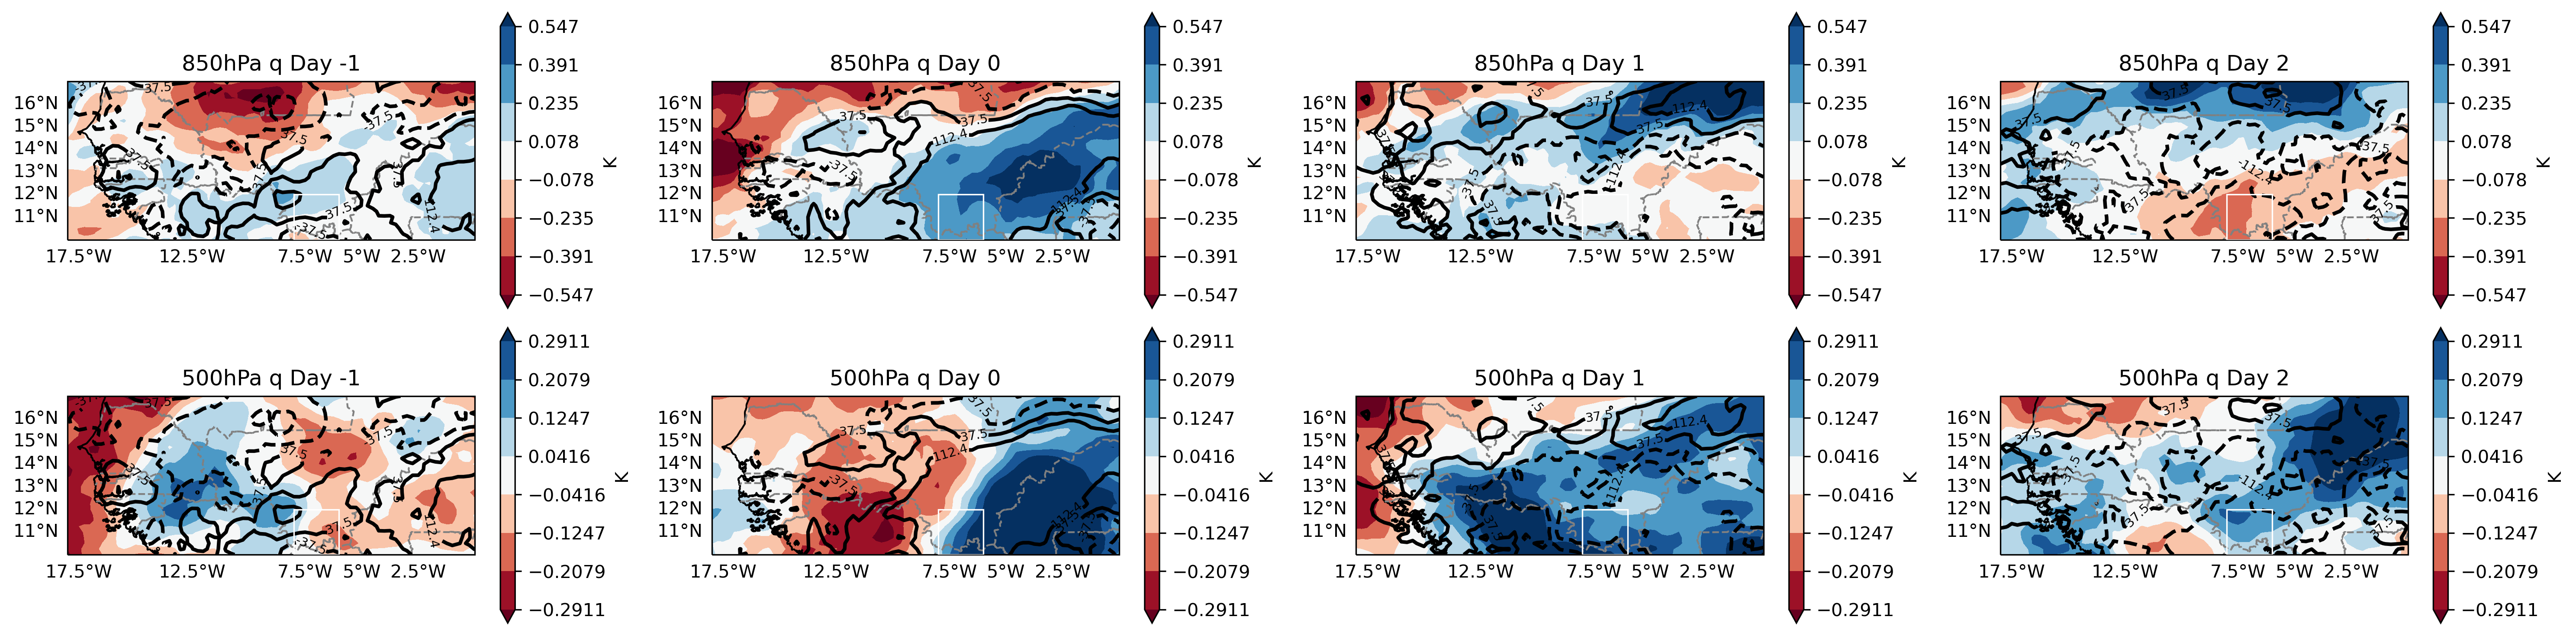

In [59]:
st=2
sarrow = 2
scale = 30
utag = 'u10'
vtag = 'v10'

f = plt.figure(figsize=(20,5), dpi=300)

for ids, num in enumerate([-1, 0,1,2]):

    ax = f.add_subplot(2,4,ids+1, projection=ccrs.PlateCarree())
    print(num)
    dic, lat, lon = run(num)
    dic = calc(dic)
    
    if ids == 0:
        lon2d, lat2d = np.meshgrid(lon,lat)
        xquiv = lon2d[sarrow::st, sarrow::st]
        yquiv = lat2d[sarrow::st, sarrow::st]
    #ipdb.set_trace()
    
    ws, wd = u_met.u_v_to_ws_wd(dic['u_orig']-dic['u10_orig'], dic['v_orig']-dic['v10_orig'])
    vart = 'q'
    var = dic[vart]*1000
    
    if ids == 0:
        edge = np.max([np.abs(np.percentile(var,1)),np.abs(np.percentile(var,99))])
        lev = np.linspace(edge*-1,edge,8) # edge*-1
    #ipdb.set_trace()
    u = dic[utag]
    v = dic[vtag]

    uu = u[sarrow::st, sarrow::st]
    vv = v[sarrow::st, sarrow::st]
    qin = {'x' : xquiv, 'y' : yquiv, 'u' : uu, 'v' : vv, 'scale' : scale}
    
    
    if vart == 'q':
        vtags = '850hPa q'
    if vart == 'qup':
        vtags = '500hPa q'
    
    cvar = 'cape'
    invar = dic[cvar]
    if ids == 0:
        edge = np.max([np.abs(np.percentile(invar,5)),np.abs(np.percentile(invar,95))])
        levs = np.linspace(edge*-1,edge,4) # edge*-1
    contour = {'data' : invar, 'x' : lon, 'y' : lat, 'levels' : levs}
    
    draw_map(ax, var, lat, lon, title=vtags+' Day '+str(num),  quiver=qin, levels=lev, contour=contour)  #levels=lev,
    
    
for ids, num in enumerate([-1, 0,1,2]):
    

    ax = f.add_subplot(2,4,ids+1+4, projection=ccrs.PlateCarree())
    print(num)
    dic, lat, lon = run(num)
    dic = calc(dic)
    
    if ids == 0:
        lon2d, lat2d = np.meshgrid(lon,lat)
        xquiv = lon2d[sarrow::st, sarrow::st]
        yquiv = lat2d[sarrow::st, sarrow::st]
    #ipdb.set_trace()
    
    ws, wd = u_met.u_v_to_ws_wd(dic['u_orig']-dic['u10_orig'], dic['v_orig']-dic['v10_orig'])
    vart = 'qup'
    var = dic[vart]*1000
    
    if ids == 0:
        edge = np.max([np.abs(np.percentile(var,1)),np.abs(np.percentile(var,99))])
        lev = np.linspace(edge*-1,edge,8) # edge*-1
    #ipdb.set_trace()
    u = dic[utag]
    v = dic[vtag]

    uu = u[sarrow::st, sarrow::st]
    vv = v[sarrow::st, sarrow::st]
    qin = {'x' : xquiv, 'y' : yquiv, 'u' : uu, 'v' : vv, 'scale' : scale}
    
    
    cvar = 'cape'
    invar = dic[cvar]
    if ids == 0:
        edge = np.max([np.abs(np.percentile(invar,5)),np.abs(np.percentile(invar,95))])
        levs = np.linspace(edge*-1,edge,4) # edge*-1
    contour = {'data' : invar, 'x' : lon, 'y' : lat, 'levels' : levs}
    
    if vart == 'q':
        vtags = '850hPa q'
    if vart == 'qup':
        vtags = '500hPa q'
    
    draw_map(ax, var, lat, lon, title=vtags+' Day '+str(num),  quiver=qin, levels=lev, contour=contour)  #levels=lev,

f.canvas.draw()
plt.tight_layout()
#plt.savefig(cnst.network_data + 'figs/NFLICS/plots/cb_same/NFLICS_ERA5anomaly_dakarstorms_anom_qtest.jpg')

In [ ]:
#np.sum((tab.lon>-5) & (tab.lon<-4) & (tab.lat>12) & (tab.lat<15))

In [ ]:
#(tab.lon>-5.5) & (tab.lon<-5) & (tab.lat>12) & (tab.lat<12.5)